<a href="https://colab.research.google.com/github/Rohit9403/Couting-Objects-Using-OpenCV/blob/master/Counting_objects_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary packages
import argparse
import imutils
import cv2
# construct the argument parser and parse the arguments
'''ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input image")
args = vars(ap.parse_args())'''

'ap = argparse.ArgumentParser()\nap.add_argument("-i", "--image", required=True,\n\thelp="path to input image")\nargs = vars(ap.parse_args())'

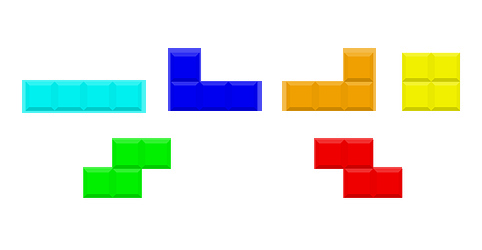

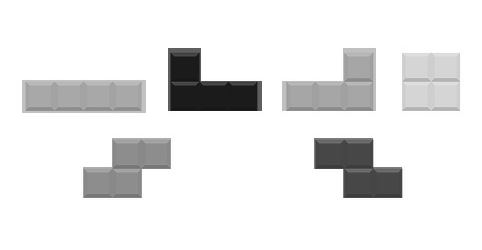

In [ ]:
# load the input image (whose path was supplied via command line
# argument) and display the image to our screen
image = cv2.imread("/content/tetris_blocks.png")
#cv2.imshow("Image", image)
from google.colab.patches import cv2_imshow
cv2_imshow(image )


# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
from google.colab.patches import cv2_imshow
cv2_imshow(gray)

# Edge detection

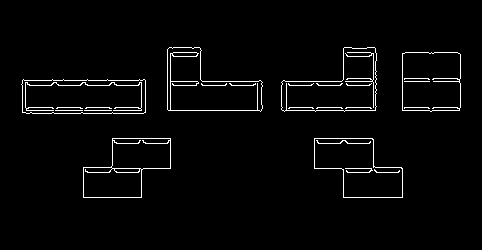

In [ ]:
# applying edge detection we can find the outlines of objects in
# images
edged = cv2.Canny(gray, 30, 150)

from google.colab.patches import cv2_imshow
cv2_imshow(edged)

#Thresholding

Image thresholding is an important intermediary step for image processing pipelines. Thresholding can help us to remove lighter or darker regions and contours of images.

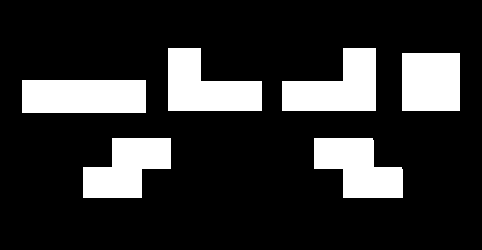

In [ ]:
# threshold the image by setting all pixel values less than 225
# to 255 (white; foreground) and all pixel values >= 225 to 255
# (black; background), thereby segmenting the image
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]

from google.colab.patches import cv2_imshow
cv2_imshow(thresh)

# Detecting and drawing contours

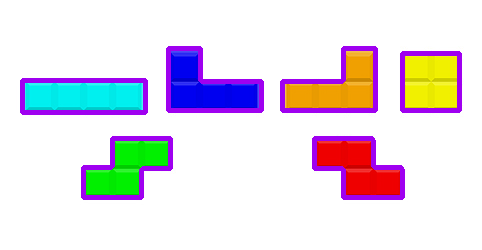

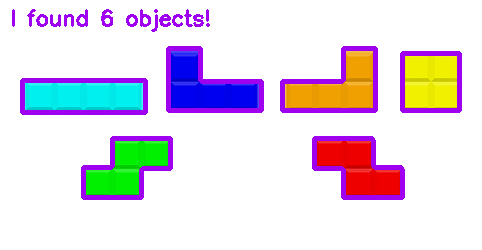

In [ ]:
# find contours (i.e., outlines) of the foreground objects in the
# thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

# loop over the contours
for c in cnts:
	# draw each contour on the output image with a 3px thick purple
	# outline, then display the output contours one at a time
	cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
cv2_imshow(output)

text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(240, 0, 159), 2)
cv2_imshow(output)
  

# Erosions and dilations

Erosions and dilations are typically used to reduce noise in binary images (a side effect of thresholding).

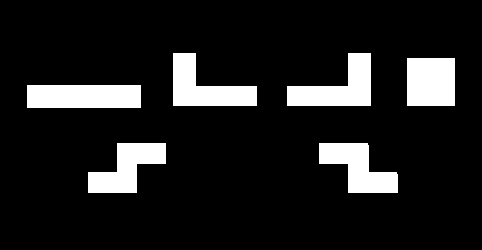

In [ ]:
# we apply erosions to reduce the size of foreground objects
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)

cv2_imshow(mask)

Similarly, we can foreground regions in the mask. To enlarge the regions, simply use cv2.dilate

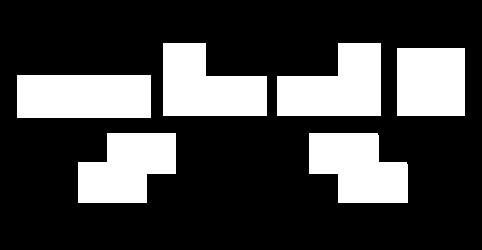

In [ ]:
# similarly, dilations can increase the size of the ground objects
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=5)
cv2_imshow(mask)


#Masking and bitwise operations

Masks allow us to “mask out” regions of an image we are uninterested in. We call them “masks” because they will hide regions of images we do not care about.

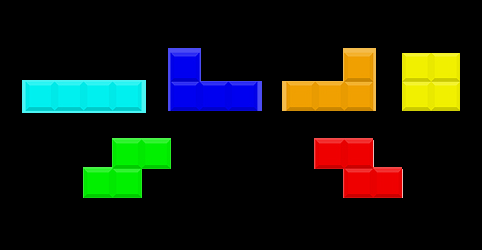

In [ ]:
# a typical operation we may want to apply is to take our mask and
# apply a bitwise AND to our input image, keeping only the masked
# regions
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)

cv2_imshow(output)